# Naive Bayes Classification

Based on Chapter 5 from *Python for Data Science Handbook*, by Jake VanderPlas.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns; sns.set()

#import warnings
#warnings.filterwarnings("ignore")

Naive Bayes models are a group of extremely fast and simple classification algorithms that are often suitable for very high-dimensional datasets.
Because they are so fast and have so few tunable parameters, they end up being very useful as a quick-and-dirty baseline for a classification problem.
This section will focus on an intuitive explanation of how naive Bayes classifiers work, followed by a couple examples of them in action on some datasets.

## Bayesian Classification

Naive Bayes classifiers are built on Bayesian classification methods.
These rely on Bayes's theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities.
In Bayesian classification, we're interested in finding the probability of a label given some observed features, which we can write as $P(L~|~{\rm features})$.
Bayes's theorem tells us how to express this in terms of quantities we can compute more directly:

$$
P(L~|~{\rm features}) = \frac{P({\rm features}~|~L)P(L)}{P({\rm features})}
$$

If we are trying to decide between two labels—let's call them $L_1$ and $L_2$—then one way to make this decision is to compute the ratio of the posterior probabilities for each label:

$$
\frac{P(L_1~|~{\rm features})}{P(L_2~|~{\rm features})} = \frac{P({\rm features}~|~L_1)}{P({\rm features}~|~L_2)}\frac{P(L_1)}{P(L_2)}
$$

All we need now is some model by which we can compute $P({\rm features}~|~L_i)$ for each label.
Such a model is called a *generative model* because it specifies the hypothetical random process that generates the data.
Specifying this generative model for each label is the main piece of the training of such a Bayesian classifier.
The general version of such a training step is a very difficult task, but we can make it simpler through the use of some simplifying assumptions about the form of this model.

This is where the "naive" in "naive Bayes" comes in: if we make very naive assumptions about the generative model for each label, we can find a rough approximation of the generative model for each class, and then proceed with the Bayesian classification.
Different types of naive Bayes classifiers rest on different naive assumptions about the data, and we will examine a few of these in the following sections.

We begin with the standard imports:

## Gaussian Naive Bayes

Perhaps the easiest naive Bayes classifier to understand is Gaussian naive Bayes.
In this classifier, the assumption is that *data from each label is drawn from a simple Gaussian distribution*.
Imagine that you have the following data:

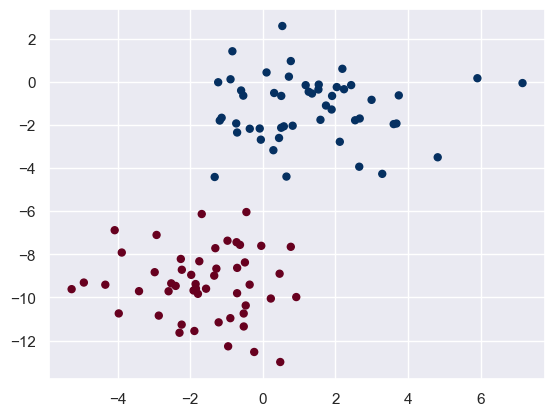

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
# This creates 100 samples with 2 features each, forming two distinct clusters. 
# The centers of the clusters are determined randomly with the given random_state, 
# and the cluster_std parameter controls the standard deviation of the clusters, affecting their spread.

plt.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='RdBu')
# The X[:, 0] and X[:, 1] represent the first and second features of the data points, respectively. 
# The 'c=y' argument colors the points according to their cluster label, where 'y' contains the cluster assignments (0 or 1). 
# The 's=25' sets the size of each point, and 'cmap='RdBu'' specifies the colormap to be used for the plot, providing a red-blue color scheme.

One extremely fast way to create a simple model is to assume that the data is described by a Gaussian distribution with no covariance between dimensions. This model can be fit by simply finding the mean and standard deviation of the points within each label, which is all you need to define such a distribution. The result of this naive Gaussian assumption is shown in the following figure:

<left>
    <img src="images/05.05-gaussian-NB.png" width="700" />
</left>

The ellipses here represent the Gaussian generative model for each label, with larger probability toward the center of the ellipses.
With this generative model in place for each class, we have a simple recipe to compute the likelihood $P({\rm features}~|~L_1)$ for any data point, and thus we can quickly compute the posterior ratio and determine which label is the most probable for a given point.

This procedure is implemented in Scikit-Learn's ``sklearn.naive_bayes.GaussianNB`` estimator:

In [3]:
from sklearn.naive_bayes import GaussianNB

# Initialize a Gaussian Naive Bayes classifier model
model = GaussianNB()

# Fit the Gaussian Naive Bayes model to the training data
model.fit(X, y);

Now let's generate some new data and predict the label:

In [4]:
# Create a random number generator, seed (0)
rng = np.random.RandomState(0)

# Generate a new set of 2000 random data points, an array of shape (2000, 2)  
# with random values between 0 and 1, which is then scaled by [14, 18] and shifted by [-6, -14].
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)

# Use the trained model to predict the class labels for the newly generated data points (Xnew).
ynew = model.predict(Xnew)


print("Xnew:")
print(Xnew)
print()
print("ynew:")
print(ynew)

Xnew:
[[ 1.68338905 -1.12659141]
 [ 2.43868727 -4.19210271]
 [-0.06883281 -2.37390596]
 ...
 [-4.32134532 -7.70649139]
 [ 0.08823081  0.94005305]
 [ 7.05928655 -8.44990818]]

ynew:
[1 1 1 ... 0 1 1]


Now we can plot this new data to get an idea of where the decision boundary is:

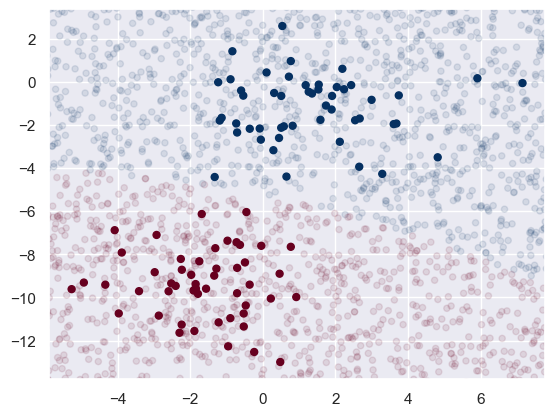

In [5]:
# Plot the original data points, coloring them according to their true class labels (y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='RdBu')                                                         # 100 points (bold)

# Get the current axis limits of the plot to ensure the new plot overlay aligns with the original plot.
lim = plt.axis()

# Plot the new data points (Xnew) with their predicted class labels (ynew). 
# The alpha=0.1 makes the points semi-transparent, allowing the original points to remain visible underneath. 
# The size of these points is set to 20.
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)                                     # 2000 points (transparent)

# Set the axis limits to the previously stored limits (lim) 
# to ensure that the new points are displayed within the same plot boundaries.
plt.axis(lim);

Here's a breakdown of the specific parameters used in **plt.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='RdBu')**:

* `X[:, 0]`: This selects the first column of the matrix X, which represents the x-coordinates of the data points.
  
* `X[:, 1]`: This selects the second column of the matrix X, representing the y-coordinates of the data points.
  
* `c=y`: This argument sets the color of the points based on the array y. Here, y contains the class labels of the data points. The colors are assigned according to these labels, providing a visual distinction between different classes.
  
* `s=25`: This sets the size of the markers used for the data points. The value 25 specifies the area of each marker in points squared.
  
* `cmap='RdBu`': This sets the colormap to 'RdBu', which is a color scheme that transitions from red to blue. It is often used to represent two different categories or classes in the data, with red representing one class and blue representing another.

We see a slightly curved boundary in the classifications—in general, the boundary in Gaussian naive Bayes is quadratic.

A nice piece of this Bayesian formalism is that it naturally allows for probabilistic classification, which we can compute using the ``predict_proba`` method:

In [6]:
# Predict the probabilities of class membership for the new data points Xnew using the trained model.
yprob = model.predict_proba(Xnew)

# Display the predicted probabilities for the last 8 data points in Xnew, rounding them to two decimal places.
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

In [7]:
yprob

array([[9.25897220e-08, 9.99999907e-01],
       [8.05934584e-04, 9.99194065e-01],
       [5.95247683e-05, 9.99940475e-01],
       ...,
       [9.99994010e-01, 5.99039932e-06],
       [1.01364165e-09, 9.99999999e-01],
       [1.53083494e-01, 8.46916506e-01]])

The columns give the posterior probabilities of the first and second label, respectively. If you are looking for estimates of uncertainty in your classification, Bayesian approaches like this can be a useful approach.

Of course, the final classification will only be as good as the model assumptions that lead to it, which is why Gaussian naive Bayes often does not produce very good results. Still, in many cases—especially as the number of features becomes large—this assumption is not detrimental enough to prevent Gaussian naive Bayes from being a useful method.

## Multinomial Naive Bayes

The Gaussian assumption just described is by no means the only simple assumption that could be used to specify the generative distribution for each label.
Another useful example is multinomial naive Bayes, where the features are assumed to be generated from a simple multinomial distribution.
The multinomial distribution describes the probability of observing counts among a number of categories, and thus multinomial naive Bayes is most appropriate for features that represent counts or count rates.

The idea is precisely the same as before, except that instead of modeling the data distribution with the best-fit Gaussian, we model the data distribuiton with a best-fit multinomial distribution.

### Example: Classifying Text

One place where multinomial naive Bayes is often used is in text classification, where the features are related to word counts or frequencies within the documents to be classified. We will use the sparse word count features from the 20 Newsgroups corpus to show how we might classify these short documents into categories.

Let's download the data and take a look at the target names:

In [8]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

For simplicity here, we will select just a few of these categories, and download the training and testing set:

In [9]:
# Define a list of categories to focus on specific topics from the 20 Newsgroups dataset.
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']

# Load the training subset of the 20 Newsgroups dataset, filtered to only include the specified categories.
train = fetch_20newsgroups(subset='train', categories=categories)

# Load the testing subset of the 20 Newsgroups dataset, filtered to only include the specified categories.
test = fetch_20newsgroups(subset='test', categories=categories)

In [10]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In order to use this data for machine learning, we need to be able to convert the content of each string into a vector of numbers.
For this we will use the TF-IDF vectorizer, and create a pipeline that attaches it to a multinomial naive Bayes classifier:

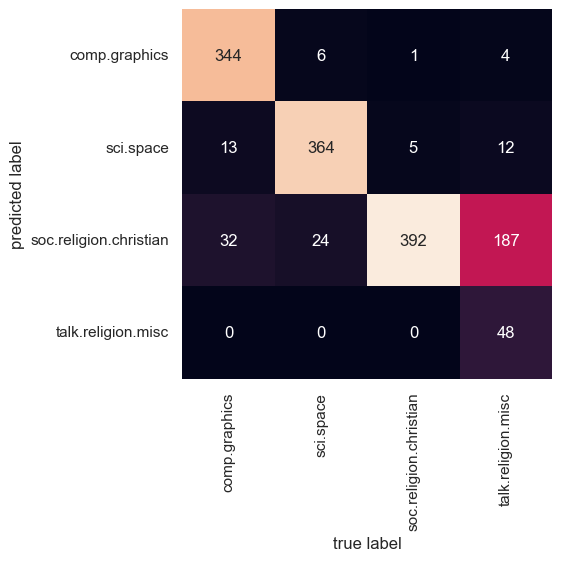

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix

# Create a machine learning pipeline with TfidfVectorizer and Multinomial Naive Bayes classifier.
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Fit the model using the training data and their corresponding target labels.
model.fit(train.data, train.target)

# Predict the labels for the test data using the trained model.
labels = model.predict(test.data)

# Generate a confusion matrix to compare the true labels with the predicted labels.
mat = confusion_matrix(test.target, labels)

# Visualize the confusion matrix using a heatmap for easier interpretation.
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)

# Set the labels for the x-axis and y-axis to indicate the true and predicted labels, respectively.
plt.xlabel('true label')
plt.ylabel('predicted label');

Evidently, even this very simple classifier can successfully separate space talk from computer talk, but it gets confused between talk about religion and talk about Christianity.
This is perhaps an expected area of confusion!

The very cool thing here is that we now have the tools to determine the category for *any* string, using the ``predict()`` method of this pipeline.
Here's a quick utility function that will return the prediction for a single string:

In [12]:
# It takes a string 's' as input, and uses the trained model and training data to make the prediction.
def predict_category(s, train=train, model=model):
    
    # Predict the category of the input string 's' using the trained model.
    # The input string is passed as a list with a single element.
    
    pred = model.predict([s])
    
    # Return the name of the predicted category using the training data's target names.
    return train.target_names[pred[0]]

# Predict and display the category for the given text: 'sending a payload to the ISS'.
predict_category('sending a payload to the ISS')

'sci.space'

In [13]:
# Predict and display the category for the given text: 'discussing islam vs atheism'.
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [14]:
# Predict and display the category for the given text: 'determining the screen resolution'.
predict_category('determining the screen resolution')

'comp.graphics'

Remember that this is nothing more sophisticated than a simple probability model for the (weighted) frequency of each word in the string; nevertheless, the result is striking.
Even a very naive algorithm, when used carefully and trained on a large set of high-dimensional data, can be surprisingly effective.

## When to Use Naive Bayes

Because naive Bayesian classifiers make such stringent assumptions about data, they will generally not perform as well as a more complicated model.
That said, they have several advantages:

- They are extremely fast for both training and prediction
- They provide straightforward probabilistic prediction
- They are often very easily interpretable
- They have very few (if any) tunable parameters

These advantages mean a naive Bayesian classifier is often a good choice as an initial baseline classification.
If it performs suitably, then congratulations: you have a very fast, very interpretable classifier for your problem.
If it does not perform well, then you can begin exploring more sophisticated models, with some baseline knowledge of how well they should perform.

Naive Bayes classifiers tend to perform especially well in one of the following situations:

- When the naive assumptions actually match the data (very rare in practice)
- For very well-separated categories, when model complexity is less important
- For very high-dimensional data, when model complexity is less important

The last two points seem distinct, but they actually are related: as the dimension of a dataset grows, it is much less likely for any two points to be found close together (after all, they must be close in *every single dimension* to be close overall).
This means that clusters in high dimensions tend to be more separated, on average, than clusters in low dimensions, assuming the new dimensions actually add information.
For this reason, simplistic classifiers like naive Bayes tend to work as well or better than more complicated classifiers as the dimensionality grows: once you have enough data, even a simple model can be very powerful.